# Cross Polar Cap Potential Example

In this notebook, we will complete a simple exercise using the new AMGeO API!

The Exercise will be as follows:

- Generate data for some dates
- Load the data into a DataSet
- Compute the Cross Polar Cap Potentials for our series of data
- Plot the Potenaials on a time series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from AMGeO.api import AMGeOApi
from datetime import datetime

Traceback (most recent call last):
  File "/Users/willemmirkovich/AMGeO/AMGeO/src/nasaomnireader/nasaomnireader/__init__.py", line 5, in <module>
    from nasaomnireader.omnireader_config import config
ModuleNotFoundError: No module named 'nasaomnireader.omnireader_config'

Solar wind data files will be saved to /Users/willemmirkovich/Library/Application Support/nasaomnireader
Traceback (most recent call last):
  File "/Users/willemmirkovich/AMGeO/AMGeO/src/nasaomnireader/nasaomnireader/omnireader.py", line 12, in <module>
    from spacepy import pycdf
ModuleNotFoundError: No module named 'spacepy'


------------IMPORTANT----------------------------
Unable to import spacepy. Will fall back to
using Omni text files, which may have slightly
different data and incomplete metadata
-------------------------------------------------



In [2]:
api = AMGeOApi()

## Generate AMGeO Data

Let's generate data for 4 specific datetimes:

- 1/1/2017 12:00:00
- 1/1/2017 13:00:00
- 1/1/2017 14:00:00
- 1/1/2017 15:00:00

Before we do that, lets set our output directory to a custom directory just for this exercise

In [3]:
api.set_output_dir('./potential_exercise_output')

Now that we have that out of the way, lets get the AMGeO Default Controller and start generating some data

In [4]:
controller = api.get_controller()

In [5]:
dts = [
    # TODO: fill in the dates!
]

# ANSWER
dts = [
    datetime(2017, 1, 1, 12, 0, 0),
    datetime(2017, 1, 1, 13, 0, 0),
    datetime(2017, 1, 1, 14, 0, 0),
    datetime(2017, 1, 1, 15, 0, 0)
]

In [6]:
# NO PEEKING
assert(datetime(2017, 1, 1, 12, 0, 0) in dts)
assert(datetime(2017, 1, 1, 13, 0, 0) in dts)
assert(datetime(2017, 1, 1, 14, 0, 0) in dts)
assert(datetime(2017, 1, 1, 15, 0, 0) in dts)

In [7]:
controller.generate(dts, 'N')

Request recieved for 2017-1-1 N
2017-1-1 N complete


## Load the data into a DataSet

In [8]:
ds = controller.load(controller.browse()[0]) # only have one day's worth of data

In [9]:
assert(ds)

## Compute the Cross Polar Cap Potential

Next, lets compute the Cross Polar Cap Potential for each of our times in the data

Note: For a given grid of electric potentials $X$, the Cross Polar Cap Potential $P(X)$ is 

$$ P(X) = V_{\text{max}} - V_{\text{min}} $$

In [10]:
epots = ds['epot']

In [11]:
def p(X):
    pass
    # TODO: compute the Potential!
    
    # HINT: for each data point, is it the max/min?
    
# ANSWER
def p(X):
    max_v = - np.infty
    min_v = np.infty
    for i in range(len(X)):
        for j in range(len(X[i])):
            curr = X[i][j]
            if curr < min_v:
                min_v = curr
            if curr > max_v:
                max_v = curr
    return max_v - min_v

In [12]:
# TODO: asserts here
# assert(p())

In [13]:
# Get all the potentials for each datetime
times = []
potentials = []
for el in epots:
    times.append(el.time)
    potentials.append(p(el))

## Plot the Potentials on a time series

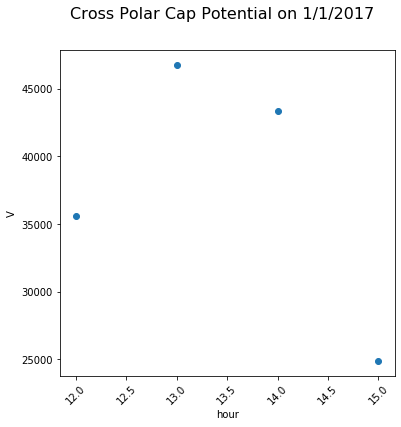

In [14]:
# string formatter for datetime64 to datetime
def get_datetimes(times):
    res = []
    for i in range(len(times)):
        x = np.datetime_as_string(times[i].time.values, unit='s')
        res.append(datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
    return res 

times = get_datetimes(times)
    
# plot the values over a time series
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter([el.hour for el in times], [int(p) for p in potentials])

# label plot
ax.set_ylabel(epots.units)
ax.set_xlabel('hour')
plt.xticks(rotation=45)
fig.suptitle('Cross Polar Cap Potential on %s/%s/%s' % (times[0].month, times[0].day, times[0].year), fontsize=16)
None